# **ASSIGNMENT #001:** 
# **LAA Image Statistical Analysis**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image #  Load Image from Pillow Library

In [2]:
atrium = Image.open('../assets/img/assn1/heart_left_atrium.jpg')
laa = Image.open('../assets/img/assn1/LAA.png')

In [3]:
def show_fig(img1,title1,img2,title2):
    plt.figure(1,figsize=(10,10))
    plt.subplot(121)
    plt.imshow(img1)
    plt.title(title1)
    #plt.xticks([]),plt.yticks([])

    plt.subplot(122)
    plt.imshow(img2)
    plt.title(title2)
    #plt.xticks([]),plt.yticks([])
    plt.show()

# Left Atrial Appendage

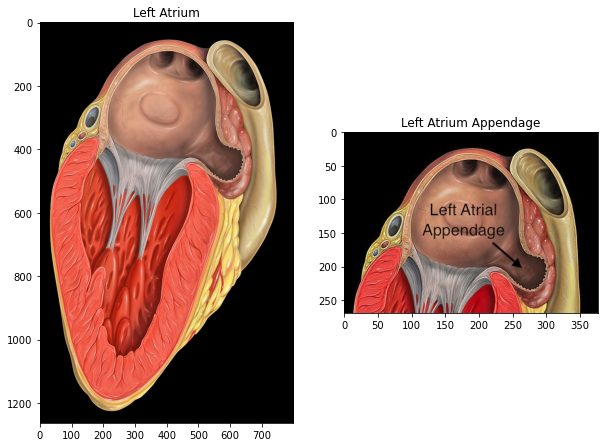

In [4]:
show_fig(atrium,"Left Atrium",laa,"Left Atrium Appendage")

## Definition

The **L**eft **A**trial **A**ppendage is a small structure that resembles a finger coming off the [**left atrium**](https://en.wikipedia.org/wiki/Atrium_(heart)) of the human heart. The appendage fills with blood and releases blood into the left [**ventricle**](https://en.wikipedia.org/wiki/Ventricle_(heart)) at the same time as the left atrium. Though this structure is not necessary to survival, it plays a role in lowering the blood pressure against the left side of the left atrium. Problems with the left atrium can lead to the removal of the left atrial appendage in some cases.

## Techniques to Improve Left Atrial Appendage  Imaging

The clinical importance of the left atrial appendage (LAA) is increasingly recognized. The assessment of the unique anatomy and function of the LAA is especially important in the setting of atrial fibrillation (AF). AF is the most commonly occurring cardiac arrhythmia, and the association of LAA thrombi and AF has been well established. Transesophageal echocardiography (TEE) is a widely available imaging tool to exclude the potential presence of LAA thrombus prior to cardioversion in patients with AF. 

### 1. Transthoracic Echocardiography (TTE)

With improved ultrasound harmonic technology, it has been increasingly possible to visualize the LAA by 2D TTE especially since the LAA and left atrium enlarge in AF patients. TTE evaluation of LAA can be systematically performed in standard views: parasternal short axis at the level of aortic and pulmonic valves with slight clockwise rotation or downward tilt of the transducer; apical 5 chamber view with upward tilting of the transducer; and the apical 2 chamber view with a slight lateral tilt or clockwise rotation of the transducer.

### 2. Transoesophageal Echocardiography (TEE)

Multiplane TEE (both 2-D and 3-D) is performed with higher frequency transducers introduced into the esophagus. TEE is a semi-invasive, highly valuable imaging modality that enables evaluation of the LAA and confident inclusion vs. exclusion of LAA thrombi.
Imaging of the LAA is systematically performed in zoomed views and multiple planes during a TEE study, starting with the high mid-esophageal view at 0 degrees with anteflexion of the probe, and followed by multiplane scanning in steady increments until the entire LAA is visualized. 

### 3. Ultrasound Contrast Agent (UCA) Enhancement of TEE

Even with TEE, imaging artifacts and lack of clear structural definition present challenges for confident detection and diagnosis of LAA thrombus. The presence of SEC and associated sluggish flow within LAA hinders the confident exclusion of LAA thrombi, while pectinate muscles or Q-tip sign frequently masquerade as LAA thrombi that don’t exist. The use of ultrasound contrast agents (UCA) comprised of microbubbles with TEE has been shown to enhance the overall TEE diagnostic performance of LAA assessment. As highlighted below, we will focus on commercially available microbubble contrast agents used with TEE studies and report on the evidence from the literature on efficacy and safety.

### 4. Three Dimensional TEE

Published data suggest that the use of bedside 3 dimensional (3D) TEE offers a real time, comprehensive imaging modality that may overcome some of the limitations of 2D TEE in the evaluation of complex LAA geometry, differentiate a thrombi from a pectinate muscle, define orifice dimensions, and permit volume quantifications. These accurate data obtained from 3D TEE facilitates the correct sizing and placement of percutaneous device closure devices. A Full volume 3D TEE pyramidal dataset covering the entire LAA is acquired usually from a 45 degree view at end-expiration with gating on ECG R wave. The 3D pyramidal dataset facilitates the reconstruction of different planes (short axis and long axis) of the LAA at different phases of cardiac cycle. Data obtained from the reconstructed planes include LAA long and short orifice diameters , LAA area tracings with automatic slicing at different levels, LAA length from the center of the orifice to tip, and LAA volume tracings.

### 5. Intracardiac Echocardiography (ICE)

Few published studies have explored the use of intracardiac echocardiography (ICE) for LAA imaging specifically in pre LAA device closure setting. CE catheter placed in the right atrium enables the visualization of most of the left atrial anatomy and hence guide percutaneous procedures. ICE is helpful in imaging the fossa ovalis to guide transseptal puncture, evaluating LAA anatomy and dimension to guide device selection and placement, verifying the LAA occlusion device efficacy and stability, and in assisting the diagnostic confirmation of dense SEC and or thrombi in patients with atrial fibrillation.

### 6. Cardiac Computed Tomography
Cardiac computed tomography (CT) has been shown to provide detailed anatomic and physiologic assessment of LAA prior to occlusive device placement; including evaluation of LAA orientation , location of tip, device position postprocedure , and evaluation of post-surgical ligations and post epicardial LAA clip device placements. LAA CT studies demonstrated a good sensitivity for the detection of thrombi but with limited specificity and high interobserver variability. This variability may relate to inadequate filling of the LAA with radiopaque contrast dye in patients with AF or atrial myopathy; hence it becomes challenging to differentiate thrombus from sluggish flow. CT Image quality can be optimized through radiopaque contrast dye injection protocols selected for optimal timing of image acquisition in relation to contrast administration.

### 7. Cardiac Magnetic Resonance Imaging (CMR)

Cardiac Magnetic Resonance (CMR) imaging provides a major advantage in the evaluation of the LAA, which, similar to ultrasound, is the absence of radiation and iodinated contrast agents. CMR can provide multiple different views of the LAA and has been utilized in device closure studies and in guiding  atrial fibrillation (AF) ablation procedures using electrophysiology mapping systems. CMR facilitates tissue characterization non-invasively with the ability to differentiate old (decreased signal intensity) from fresh (increased signal intensity) thrombus.

## Statistical Analysis 

In [5]:
axial = Image.open('../assets/img/assn1/cabi/axial/pic.png')
coronal = Image.open('../assets/img/assn1/cabi/coronal/pic.png')
sagittal = Image.open('../assets/img/assn1/cabi/sagittal/pic.png')

In [6]:
# Detects Region of Image that interests us
def get_roi_interest(img):
    rows = img.shape[0]
    cols = img.shape[1]
    roi = list()
    for r in range(rows):
        for c in range(cols):
            pixel = img[r][c]
            if (pixel[0]  != 255) and (pixel[1] != 255) and (pixel[2] != 255):
                for p in pixel:
                    roi.append(p)
    return np.asarray(roi)           

In [7]:
# Find ROI 4-quantiles (quartiles)
def get_roi_quartiles(roi):
    n = len(roi) // 2
    Q1 = np.median(roi[:n])
    Q2 = np.median(roi)
    Q3 = np.median(roi[n:])
    return Q1,Q2,Q3

In [8]:
# Display Image Statiscal Info
def get_stat_info(img):
    roi = get_roi_interest(np.asarray(img)[:,:,:3])
    std = roi.std()
    Q1,Q2,Q3 = get_roi_quartiles(np.sort(roi,axis=None))
    print("Format:",img.format)
    print("Colorspace:",img.mode)
    print("Size:",img.size)
    print("ROI Min:",roi.min())
    print("ROI Max:",roi.max())
    print("ROI Mean:",roi.mean())
    print("ROI Median:",Q2)
    print("Q1={}, Q2={}, Q3={}".format(Q1,Q2,Q3))
    print("Interquartile Range(IQR):",Q3-Q1)
    print("Standard Deviation:",std)
    print("Variance:",std*std)

In [9]:
a= np.array([10,2,5,8,])
np.sort(a,axis=None)

array([ 2,  5,  8, 10])

In [10]:
print("Axial LAA Image Statistic Info")
print("==============================")
get_stat_info(axial)

Axial LAA Image Statistic Info
Format: PNG
Colorspace: RGBA
Size: (157, 71)
ROI Min: 0
ROI Max: 254
ROI Mean: 118.4328161109277
ROI Median: 112.0
Q1=102.0, Q2=112.0, Q3=125.0
Interquartile Range(IQR): 23.0
Standard Deviation: 33.67649278677174
Variance: 1134.106166417489


In [11]:
print("Coronal LAA Image Statistic Info")
print("==============================")
get_stat_info(coronal)

Coronal LAA Image Statistic Info
Format: PNG
Colorspace: RGBA
Size: (130, 74)
ROI Min: 58
ROI Max: 254
ROI Mean: 162.45555555555555
ROI Median: 162.0
Q1=145.0, Q2=162.0, Q3=179.0
Interquartile Range(IQR): 34.0
Standard Deviation: 30.476452853596854
Variance: 928.8141785375118


In [12]:
print("Sagittal LAA Image Statistic Info")
print("==============================")
get_stat_info(sagittal)

Sagittal LAA Image Statistic Info
Format: PNG
Colorspace: RGBA
Size: (100, 123)
ROI Min: 0
ROI Max: 254
ROI Mean: 115.32680673193268
ROI Median: 110.0
Q1=100.0, Q2=110.0, Q3=119.0
Interquartile Range(IQR): 19.0
Standard Deviation: 36.81888360597096
Variance: 1355.630189990037


In [13]:
# Find the distance of rgb pixels
def distance(pixel,w=[1/3,1/3,1/3]):
    r,g,b = pixel[0],pixel[1],pixel[2]
    w0,w1,w2=w[0],w[1],w[2]
    return ((r**2)*w0+(g**2)*w1+(b**2)*w2)**0.5

# Change a specific pixel's color to the given one
def change_pixel_color(pixel,color):
    for i in range(len(pixel)):
        pixel[i] = color[i]

In [14]:
# Colorize an image into different colors
def colorize(img):
    green = [0, 128, 0]
    yellow = [255, 255, 0]
    red = [255, 0, 0]
    roi = get_roi_interest(img)
    mean = roi.mean()
    std = roi.std()
    
    rows = img.shape[0]
    cols = img.shape[1]
    
    new_img = img[:,:,:]
    for r in range(rows):
        for c in range(cols):
            if (new_img[r][c][0]  != 255) and (new_img[r][c][1] != 255) and (new_img[r][c][2] != 255):
                #print(new_img[r][c])
                d = distance(new_img[r][c])
                if (mean-std) < d  and (mean+std) > d:
                    change_pixel_color(new_img[r][c],green)
                elif (mean-2*std) < d  and (mean+2*std) > d:
                    change_pixel_color(new_img[r][c],yellow)
                elif (mean-3*std) < d  and (mean+3*std) > d:
                    change_pixel_color(new_img[r][c],red)
    return new_img        

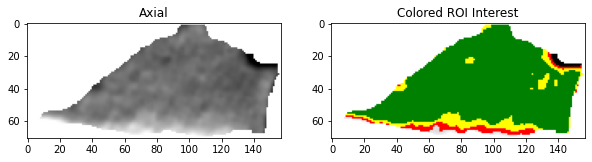

In [15]:
show_fig(axial,"Axial",colorize(np.array(axial)[:,:,:3]),"Colored ROI Interest")

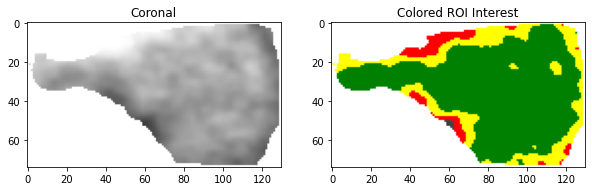

In [16]:
show_fig(coronal,"Coronal",colorize(np.array(coronal)[:,:,:3]),"Colored ROI Interest")

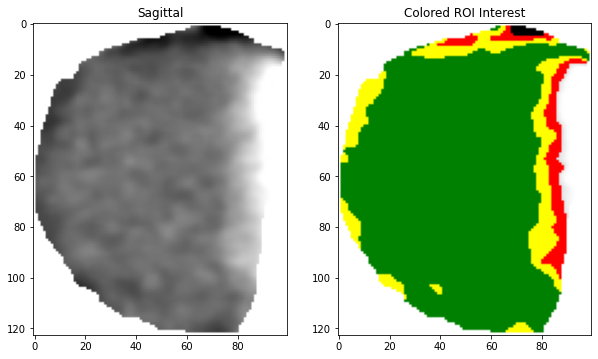

In [17]:
show_fig(sagittal,"Sagittal",colorize(np.array(sagittal)[:,:,:3]),"Colored ROI Interest")